In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##### Step 1: Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

Data source: 'https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29'

This data set contains several hundreds of credit card applications. The features names are changed to meaningless names in order to protect the confidentiality of the applications.

There are 14 features in this dataset and 2 classes (0, 1). Even though the feature names and class names are hidden due to the nature of this dataset, I believe the purpose of this dataset is to develop a model that predicts whether a credit card application gets approved or not given its 14 features.

This dataset is an more polished version of the original dataset, which can also be found in the UCI Machine Learning database. Many missing values are filled and non-numerical values are also converted to numerical ones in order to simplify the data processing and broaden the algorithms selection.

##### Step 2: Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.

sample row of data: 1 22.08 11.46 2 4 4 1.585 0 0 0 1 2 100 1213 0

As far as I can see, there are no missing data or corrupt data in this dataset. The dataset is interesting because it contains different categories of values: categorical, integer, and real. Here I'm going to create some histograms and boxplots for this dataset below.

In [72]:
import pandas as pd
from sklearn import tree
from numpy import genfromtxt

clf = tree.DecisionTreeClassifier()
db = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
df = pd.read_csv(db, header=None, sep=' ')
arr = df.values

features_train = arr[:-1,0:14]
classes_train = arr[:-1,14]

clf = clf.fit(features_train, classes_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e57fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1246794d0>]], dtype=object)

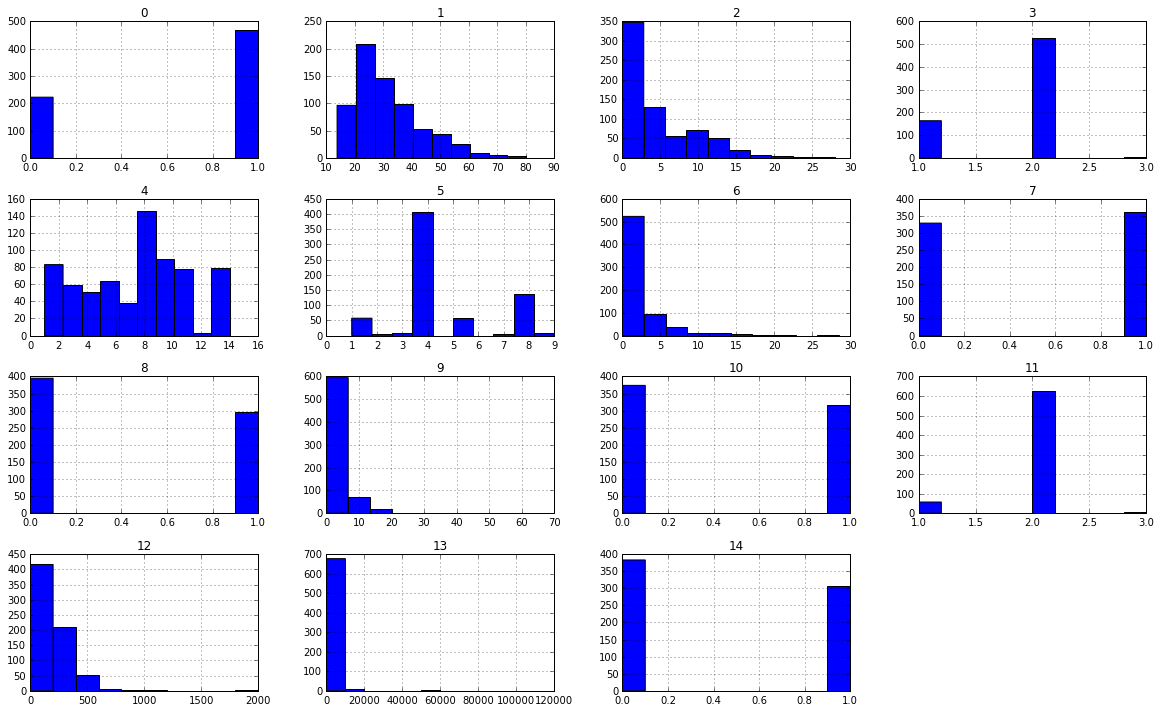

In [28]:
df.hist(figsize=(20,12))

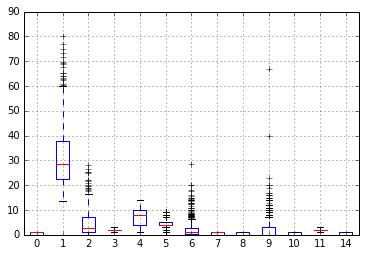

In [58]:
# Boxplots for columns except for 12 and 13 (which have very large values)
box = df.boxplot(column=[0,1,2,3,4,5,6,7,8,9,10,11,14], grid=True, return_type='axes')

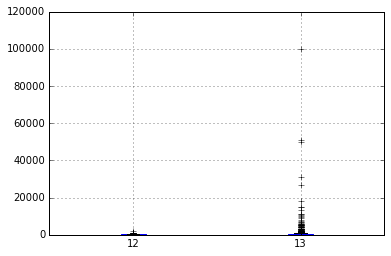

In [57]:
# Boxplots for columns 12, 13
box = df.boxplot(column=[12, 13], grid=True, return_type='axes')

##### Step 3 & 4: Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn. 

##### The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

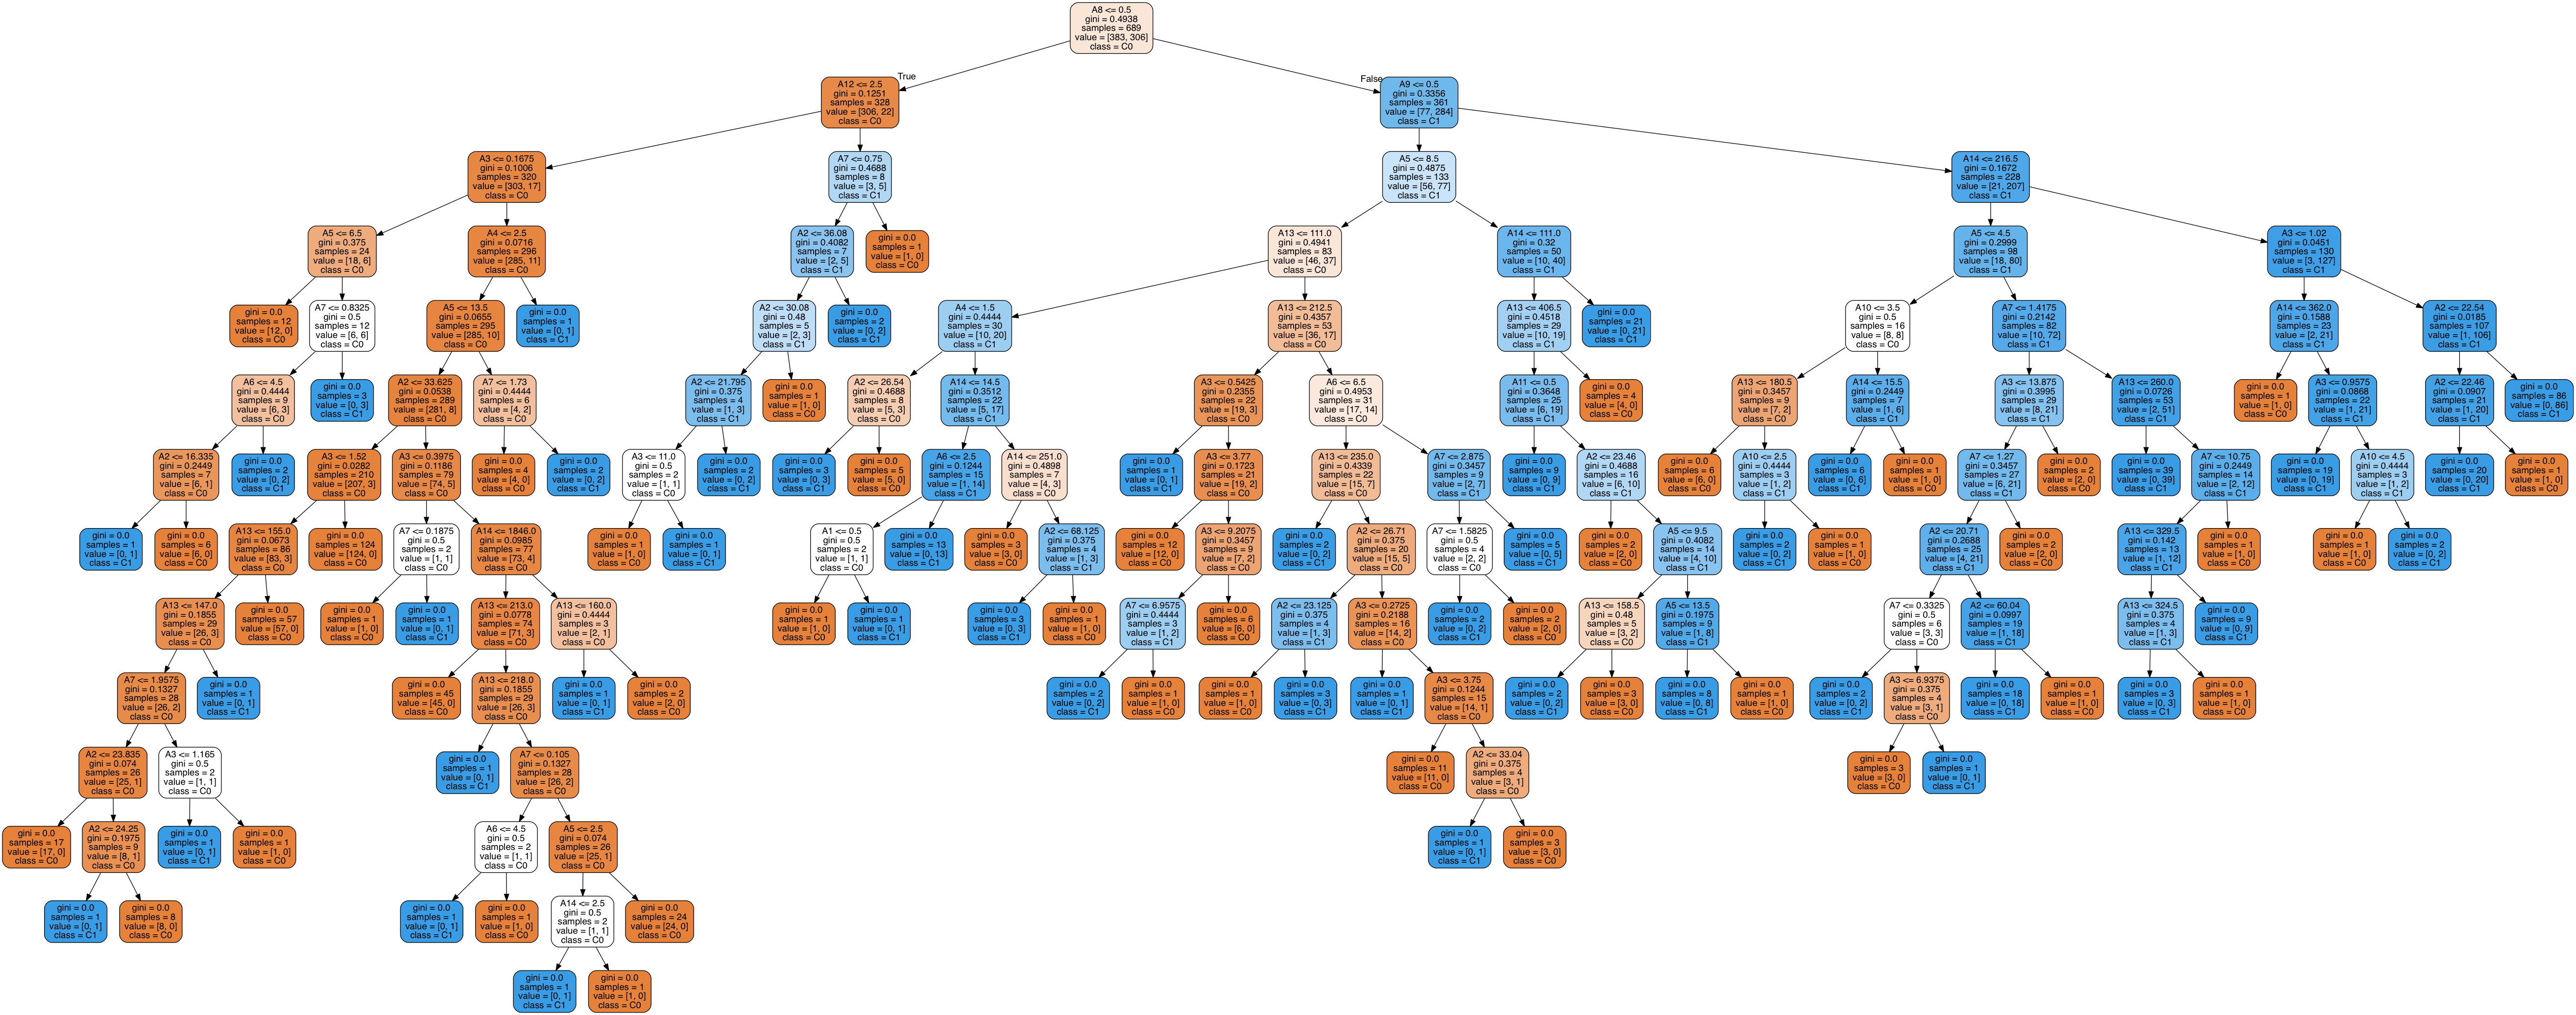

In [17]:
from IPython.display import Image  
import pydotplus

features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']
class_names = ['C0', 'C1']

with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names=features, class_names=class_names, filled=True, rounded=True, out_file=f)

graph = pydotplus.graph_from_dot_data(open('tree.dot').read()) 
Image(graph.create_png())  

##### Step 5: Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

Since meanings of the columns in this dataset is unknown to me due to privacy protection, I will use the last instance of this dataset to test the model. 

In [73]:
features_test = arr[-1,0:14]
classes_test = arr[-1,14]

# test instance: 1, 41, 0.04, 2, 10, 4, 0.04, 0, 1, 1, 0, 1, 560, 1, 1
# test instance class: 0

clf.predict(features_test)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])

As we can see, the model predicts the class to be 0. However, the actual class of this instance is 1. So the model fails to predict the result. Let's go back to the decision tree and see how the result is traced down to from the decision tree.

Start from Root:

A8 = 0 ---> Go left

A12 = 1 ---> Go left

A3 = 0.04 ---> Go left

A5 = 10 ---> Go right

A7 = 0.04 ---> Go left

A6 = 4 ---> Go left

A2 = 41 ---> Go right

Reach leaf: class = C0

So in summary, when using the default decision tree classifier, with all parameters at default settings, the model did not get the correct class result we expect.

Let's see what parameters we can change to improve the accuracy of this credit card approval model.

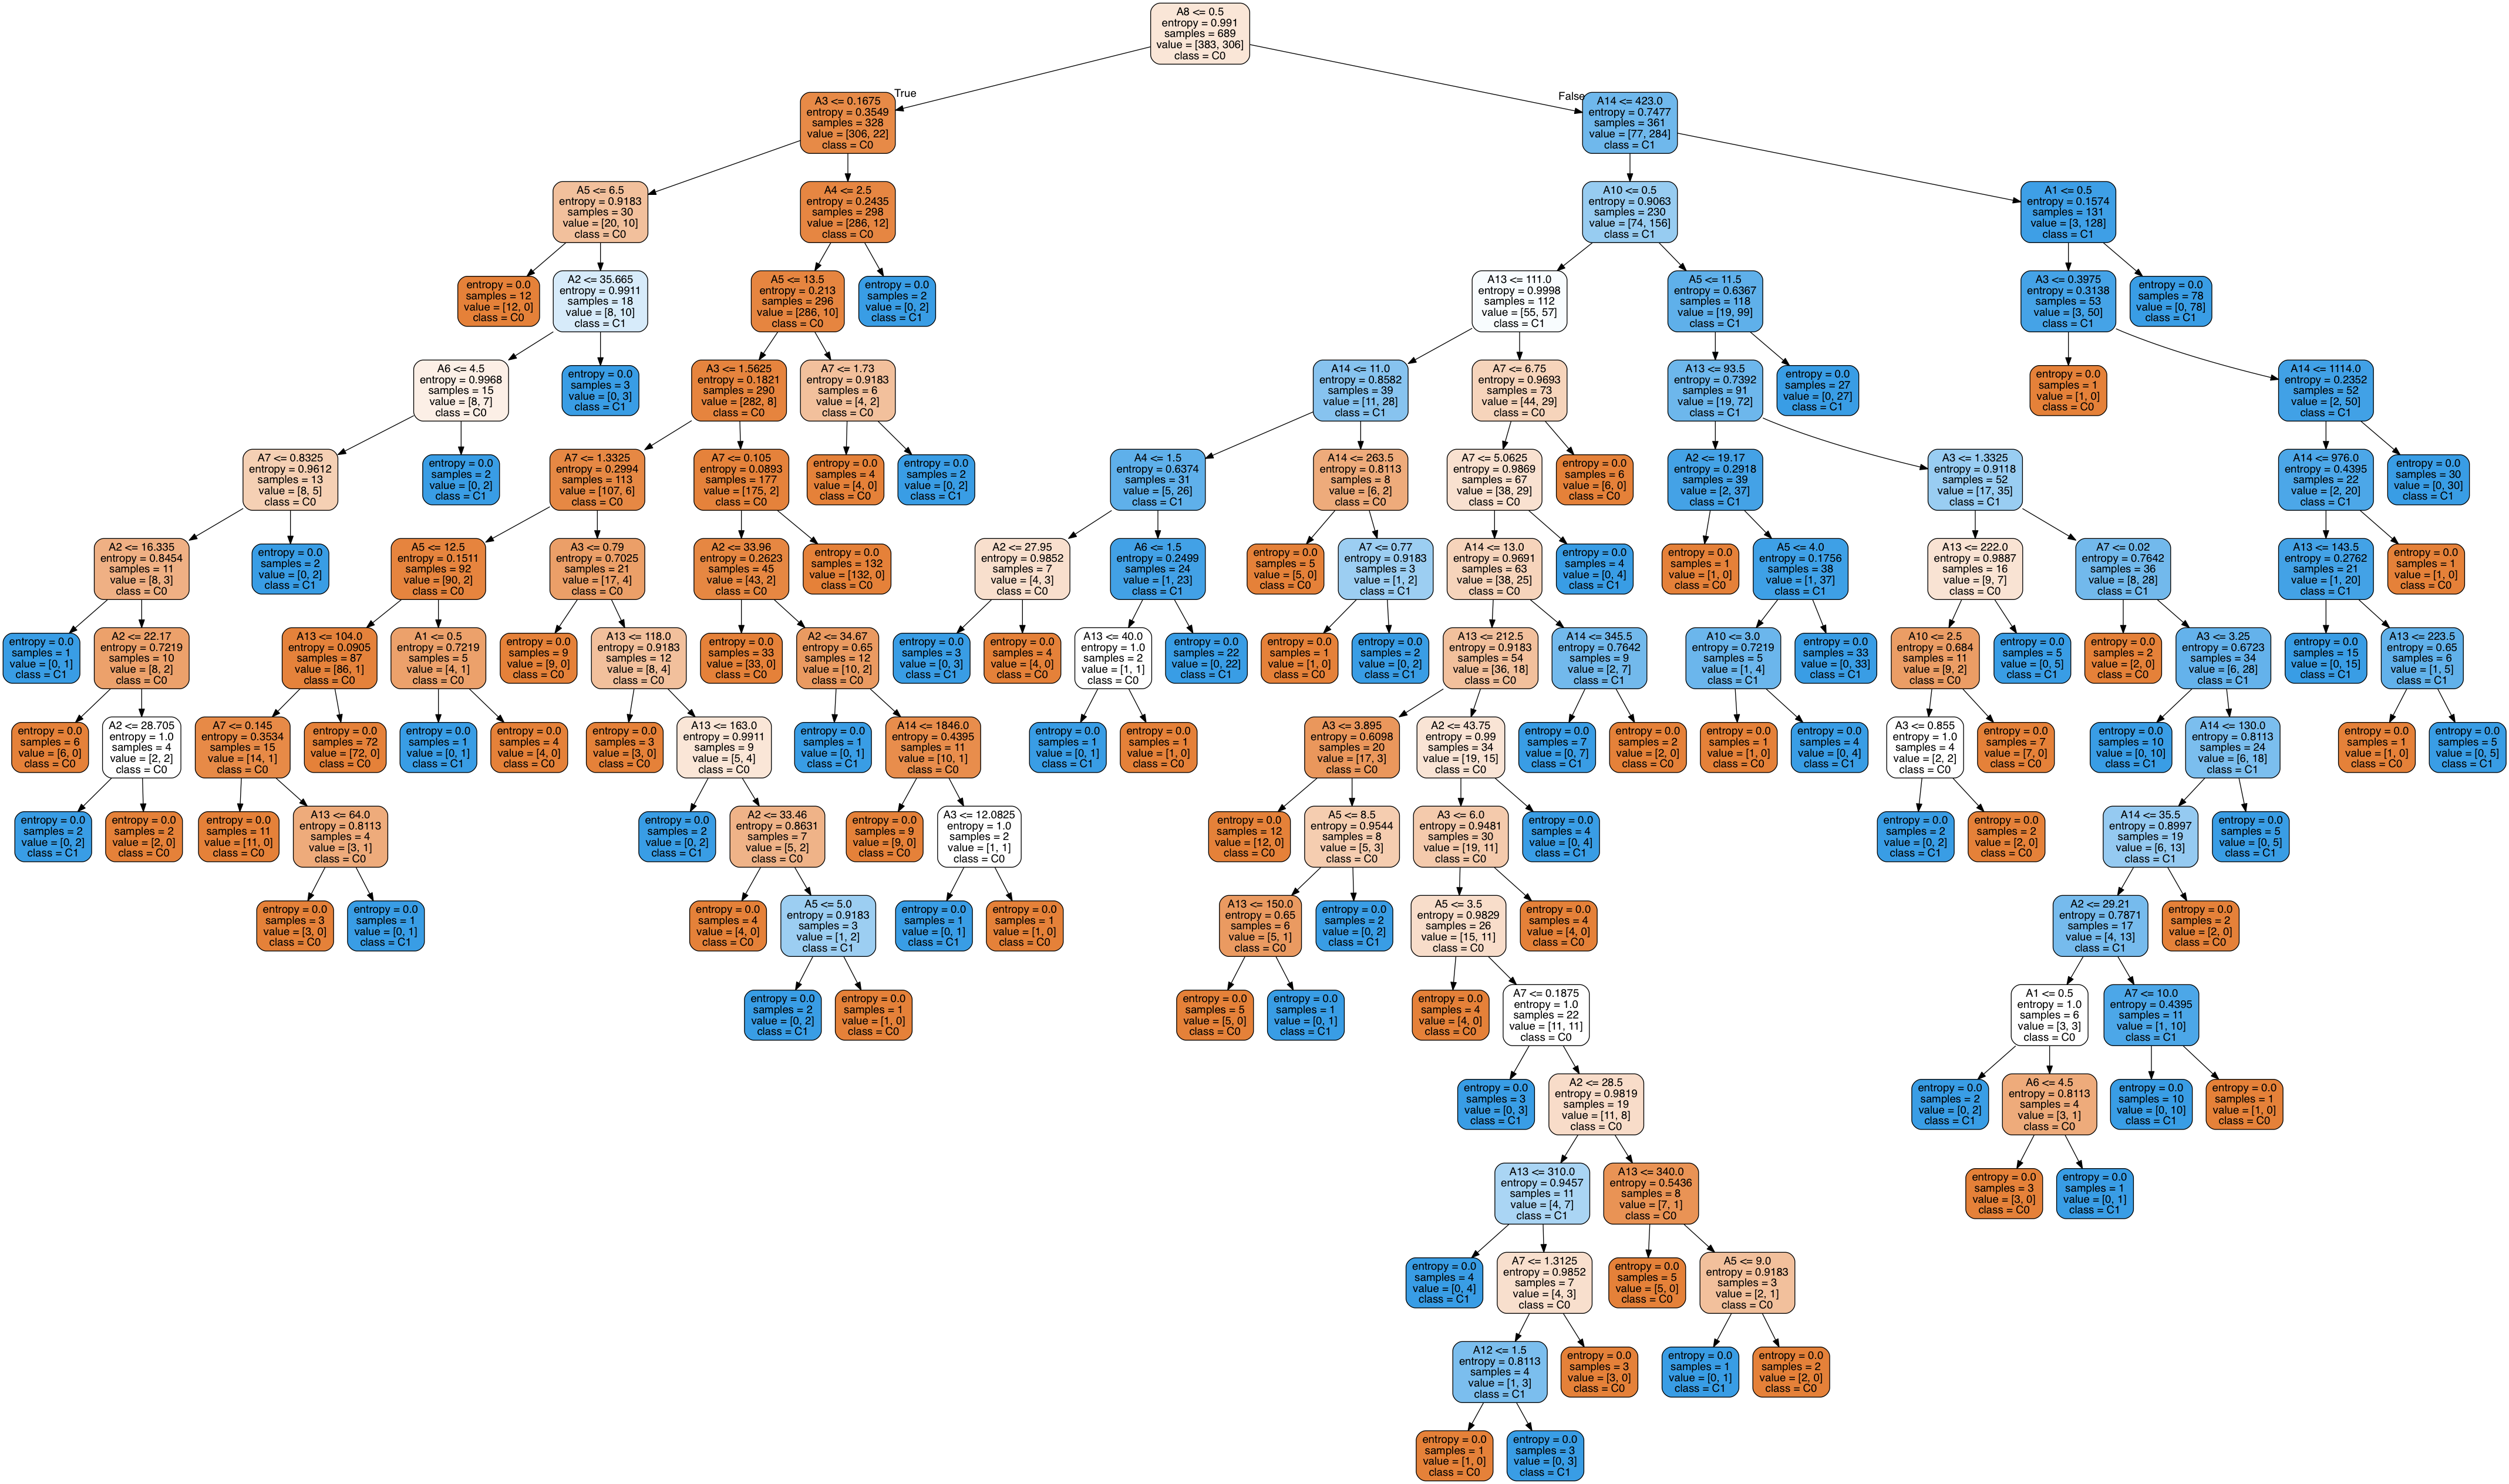

In [86]:
from IPython.display import Image  
import pydotplus

clf_2 = tree.DecisionTreeClassifier(criterion='entropy')
clf_2 = clf_2.fit(features_train, classes_train)

features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']
class_names = ['C0', 'C1']

with open("tree2.dot", 'w') as f:
    f = tree.export_graphviz(clf_2, feature_names=features, class_names=class_names, filled=True, rounded=True, out_file=f)

graph = pydotplus.graph_from_dot_data(open('tree2.dot').read()) 
Image(graph.create_png())  

In [87]:
features_test = arr[-1,0:14]
classes_test = arr[-1,14]

# test instance: 1, 41, 0.04, 2, 10, 4, 0.04, 0, 1, 1, 0, 1, 560, 1, 1
# test instance class: 0

clf_2.predict(features_test)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

As we can see, this time the model correctly predicts the class to be 1. To obtain this result, I changed the 'criterion' paramter of the decision tree classifier from 'gini' to 'entropy'. Basically I changed how the classifier evaluate the quality of a split. When using the information gain method in this case, the accuracy of the classifier improves and gives out the correct classfication.

I also generated a new decision tree using the information gain method, and let's trace down from this new tree to see how the classifier gives out the correct output.

Start from Root:

A8 = 0 ---> Go left

A3 = 0.04 ---> Go left

A5 = 10 ---> Go right

A2 = 41 ---> Go right

Reach leaf Node: class = C1

##### Now the model predicts the new instance correctly! :)